In [11]:
%%writefile eval.txt
prompt score
alignment 1.0
gaussian_input_emin 0.52
karplusant 0.12
langevin_dynamics 0.32
mc_harmonic 0.59
mc_ising 0.73
nwchem_input_emin 0.58
plot_3d_sin 0.37
plot_bar 0.97
plot_contour 0.7
plot_correlation 0.62
plot_dual_axis 0.33
plot_emoji 0.11
plot_outside_legend 0.75
plot_pointsize 0.19
plot_sin 1.0
plot_sin_polar 0.64
protein-render 0.0
pyscf_energy 0.67
random_walk 0.88
remove-water 0.9
sasa 0.53
velocity_verlet_integration 0.66

Overwriting eval.txt


In [15]:
%%writefile prompts.txt
,name,language,context,topic,type,natlang
3,alignment,python,mdtraj,md,human,en
27,gaussian_input_emin,python,python,qm,human,en
35,karplusant,python,numpy,spectroscopy,human,en
38,langevin_dynamics,python,numpy,sim,human,en
45,mc_harmonic,python,numpy,sim,human,en
46,mc_ising,python,numpy,sim,human,en
51,nwchem_input_emin,python,python,qm,human,en
59,plot_3d_sin,python,matplotlib,plot,human,en
60,plot_bar,python,matplotlib,plot,human,en
61,plot_contour,python,matplotlib,plot,human,en
62,plot_correlation,python,matplotlib,plot,human,en
63,plot_dual_axis,python,matplotlib,plot,human,en
64,plot_emoji,python,matplotlib,plot,human,en
65,plot_outside_legend,python,matplotlib,plot,human,en
66,plot_pointsize,python,matplotlib,plot,human,en
67,plot_sin,python,matplotlib,plot,human,en
68,plot_sin_polar,python,matplotlib,plot,human,en
70,protein-render,python,mdtraj,bio,human,en
73,pyscf_energy,python,pyscf,qm,human,en
77,random_walk,python,numpy,sim,human,en
79,random_walk,python,numpy,stats,human,en
81,remove-water,python,mdtraj,md,human,en
89,sasa,python,mdtraj,md,human,en
91,sasa,python,mdtraj,bio,human,en
102,velocity_verlet_integration,python,numpy,sim,human,en

Writing prompts.txt


In [24]:
data.head()

,prompt,score
0,alignment,1.00
1,gaussian_input_emin,0.52
2,karplusant,0.12
3,langevin_dynamics,0.32
4,mc_harmonic,0.59


In [12]:
import pandas as pd

In [16]:
data = pd.read_csv('eval.txt', sep=' ')
prompts = pd.read_csv('prompts.txt')

In [37]:
topics = []
for i in range(len(data)):
    topics.append(prompts.topic[prompts.name.str.contains(data.iloc[i,0])].values[0])
print(topics)

['md', 'qm', 'spectroscopy', 'sim', 'sim', 'sim', 'qm', 'plot', 'plot', 'plot', 'plot', 'plot', 'plot', 'plot', 'plot', 'plot', 'plot', 'bio', 'qm', 'sim', 'md', 'md', 'sim']


In [38]:
data['topic'] = topics

In [39]:
data.groupby('topic').mean()

,score
topic,
bio,0.000
md,0.810
plot,0.568
qm,0.590
sim,0.636
spectroscopy,0.120


In [40]:
len(data)

23

In [41]:
data.mean()

<ipython-input-41-abc01cf6c622>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


score    0.573043
dtype: float64

In [51]:
import random
import urllib.request
import warnings
from rdkit.Chem.Draw import IPythonConsole
from rdkit.rdBase import BlockLogs
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# make sure it is called here!
from IPython import get_ipython

get_ipython().run_line_magic("matplotlib", "inline")


# matplotlib_inline.backend_inline.set_matplotlib_formats()
block = BlockLogs()
random.seed(0)
np.random.seed(0)
IPythonConsole.ipython_useSVG = True
IPythonConsole.drawOptions.useBWAtomPalette()
IPythonConsole.drawOptions.drawMolsSameScale = False
warnings.filterwarnings("ignore")

urllib.request.urlretrieve(
    "https://github.com/google/fonts/raw/main/ofl/courierprime/CourierPrime-Regular.ttf",
    "CourierPrime-Regular.ttf",
)
fe = mpl.font_manager.FontEntry(fname="CourierPrime-Regular.ttf", name="courierprime")
mpl.font_manager.fontManager.ttflist.append(fe)
color_cycle = ["#444444", "#1BBC9B", "#a895bb", "#F06060", "#F3B562", "#80cedb"]
mpl.rcParams.update(
    {
        "axes.facecolor": "#f5f4e9",
        "grid.color": "#AAAAAA",
        "axes.edgecolor": "#333333",
        "figure.facecolor": "#FFFFFFFF",
        "axes.grid": False,
        "axes.prop_cycle": plt.cycler(color=color_cycle),
        "font.family": fe.name,
        "font.size": 14,
        "figure.figsize": (4.5, 4.5 / 1.3),
        "figure.dpi": 200,
        "ytick.left": True,
        "xtick.bottom": True,
        "image.cmap": "gist_yarg",
        "lines.markersize": 6,
    }
)
import skunk

In [114]:
import selfies as sf



sf.decoder(sf.encoder('CC1=C(C=CC=C1)C2=CC=CC=C2'))

'CC1=C(C=CC=C1)C2=CC=CC=C2'

In [123]:
%%writefile chem_prompts.csv
prompts,smiles
This is a drug-like molecule with a tertiary amine and phenol, CCN(CC)CCOC1=CC=C(C=C1)C2=CC(=CC=C2)C#N
This is a drug-like molecule with a bicyclic ring, CC1=C(C=CC=C1)C2=CC=CC=C2
This is a weakly lipophilic drug-like molecule with two rings, C1CC2C(C1)CC(C2)C3=CC=CC=C3
This is a very lipophilic drug-like molecule with two rings, CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC

Overwriting chem_prompts.csv


In [124]:
Chem.MolFromSmiles('CCN(CC)CCOc1ccc(cc1)c2cc(ccc12)C#N')

[10:43:51] SMILES Parse Error: unclosed ring for input: 'CCN(CC)CCOc1ccc(cc1)c2cc(ccc12)C#N'


In [125]:
data = pd.read_csv('chem_prompts.csv')

In [157]:
def hex2rgb(hex):
    return tuple(int(hex[i:i+2], 16)/255. for i in (0, 2, 4))

def mol2svg(m, size):
    dos = Chem.Draw.MolDrawOptions()
    dos.useBWAtomPalette()
    dos.setBackgroundColour(hex2rgb('f5f4e9'))
    dos.minFontSize = 8
    d = Chem.Draw.rdMolDraw2D.MolDraw2DSVG(*size)
    d.SetDrawOptions(dos)
    d.DrawMolecule(m)
    d.FinishDrawing()
    return d.GetDrawingText()

svgs = []
for s in data.smiles:
    # clean it
    #s = sf.decoder(sf.encoder(str(s)))
    print(len(s))
    m = Chem.MolFromSmiles(s)
    print(m)
    si = mol2svg(m, (200,200))
    svgs.append(si)

40
26
28
505


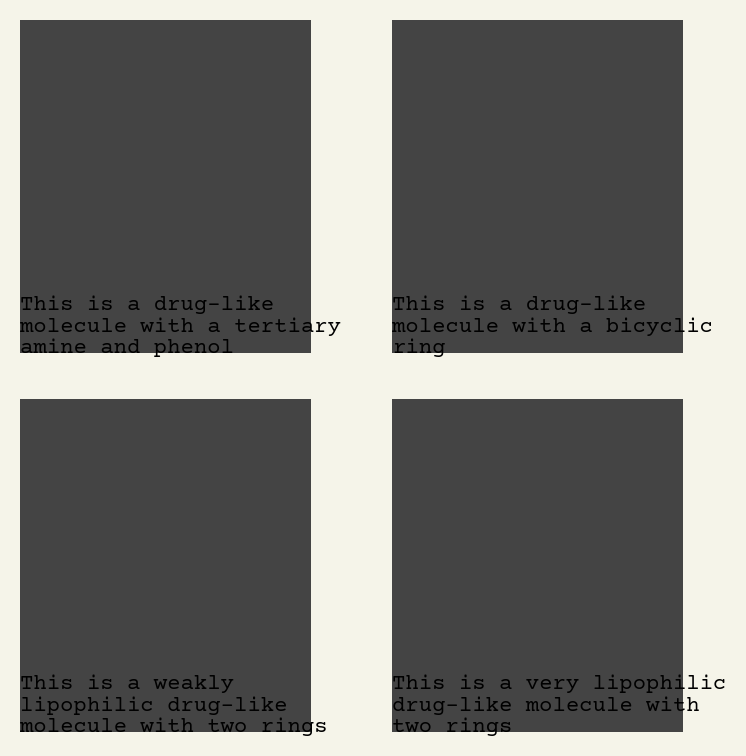

In [156]:
from textwrap import wrap
import cairosvg
fig, axs = plt.subplots(2,2, figsize=(4,4), facecolor='#f5f4e9')
for i, ax in enumerate(axs.ravel()):
    #ax.axis([0,10,0,10])
    ax.text(0,0,'\n'.join(wrap(data.prompts[i], 25)), ha='left', fontsize=8)
    skunk.connect(ax, f'sk{i}')
    ax.axis('off')  
    ax.set_facecolor('#f5f4e9')
plt.tight_layout()
svg = skunk.insert({f'sk{i}':s for i,s in enumerate(svgs)})
#plt.set_face
skunk.display(svg)
cairosvg.svg2pdf(bytestring=svg, write_to='mols.pdf')